In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datetime
df.set_index("Month", inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()


<Figure size 1000x600 with 1 Axes>

In [2]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [3]:
#check for missing values
df.isnull().values.any()
#There are no missing values in our dataset however, in bid to explain how we handle 
#missing values, we will make a copy of our dataset and delete some values at random.
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [4]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()




Passengers    0
dtype: int64

In [5]:
#Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()

#Upsample to daily data points
df_daily = df.resample('D').mean()

df_quarterly

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


Text(0,0.5,'Passengers')

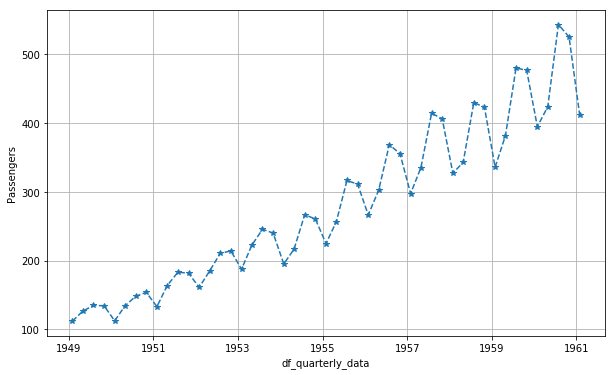

In [7]:


plt.figure(figsize=( 10 , 6 ))
plt.plot(df_quarterly.index, df_quarterly.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'df_quarterly_data' )
plt.ylabel( 'Passengers' )

Text(0,0.5,'Passengers')

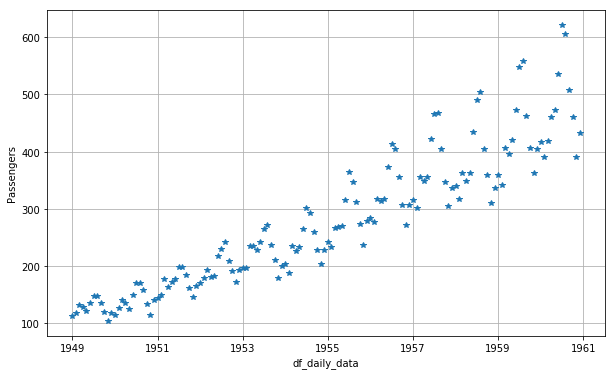

In [8]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'df_daily_data' )
plt.ylabel( 'Passengers' )

Text(0,0.5,'Passengers')

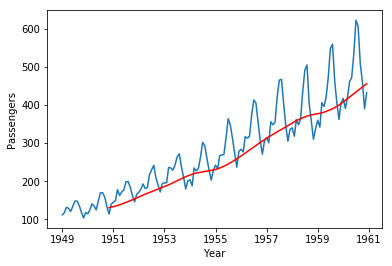

In [9]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()
plt.plot(df.index, df.Passengers, '-')
plt.plot(MA.rolling(12).mean(), color='red')
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

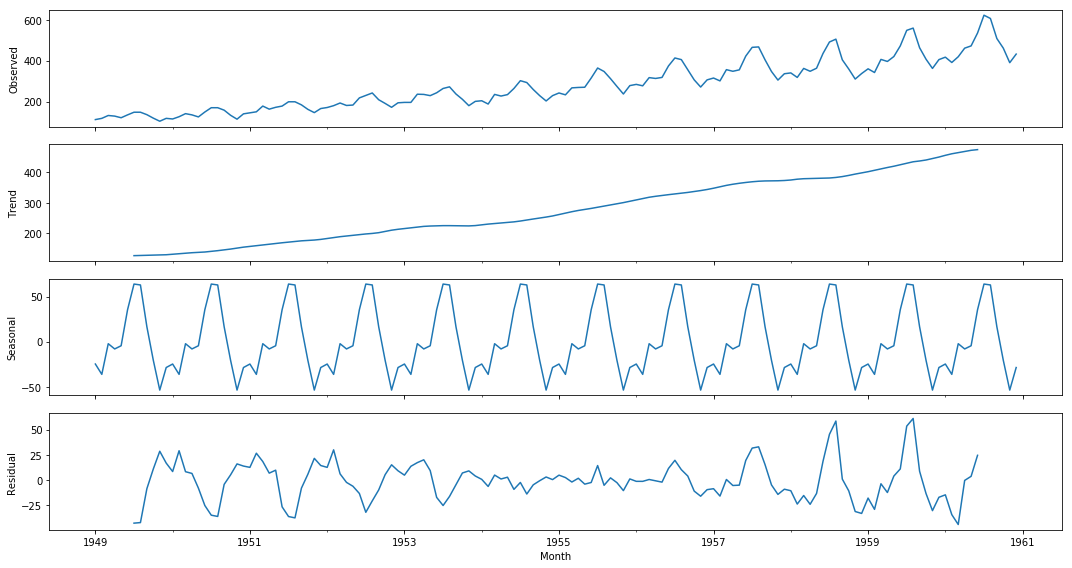

In [23]:
#Time Series Specific Explanatory Models
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 15, 8

decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()


The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation




In [34]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p_value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print(f'Critical_values:')
for k, v in adf_result[4].items():
  print( f'{k} : {v}')


ADF Statistic: 0.8153688792060465
p_value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical_values:
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598


In [37]:
#Perform Dickey-Fuller test2
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df['Passengers'], autolag='BIC')
adf_output= pd.Series(adf_result[0:4], index=['ADF Statistic','p_value','No. of lags used','No. of observations used'])
print (adf_output)
for k, v in adf_result[4].items():
  print( f'{k} : {v}')



ADF Statistic                 0.815369
p_value                       0.991880
No. of lags used             13.000000
No. of observations used    130.000000
dtype: float64
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598


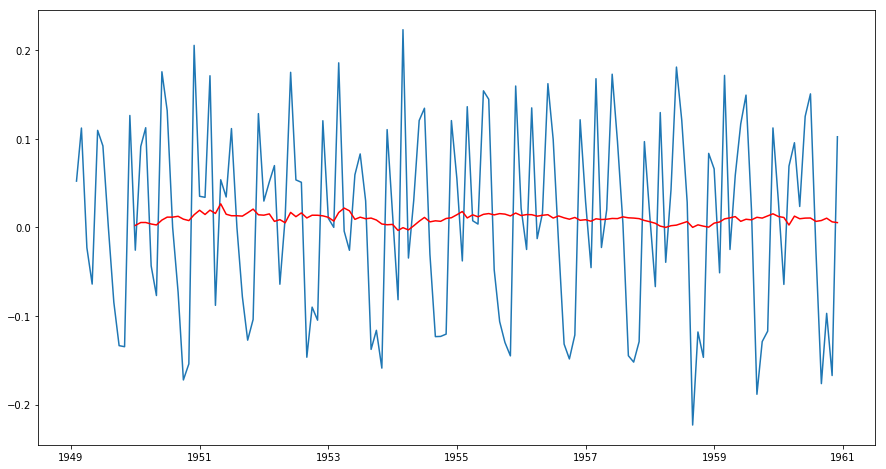

In [38]:
#From the results obtained, the p-value is greater than the critical value at a 5% #significance level and, the ADF statistic is greater that any of the critical values obtain,so we cannot reject the null hypothesis.
#This confirms that the series is indeed non-stationary.
#So we estimate the trend
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing


df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

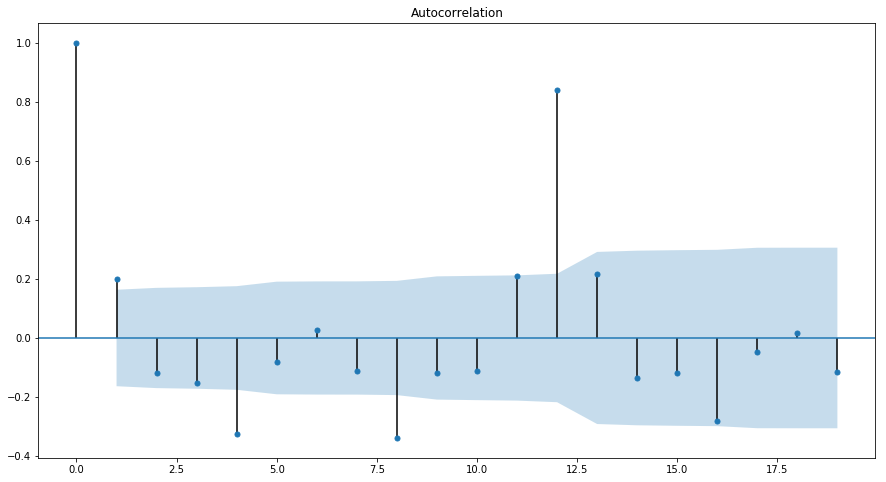

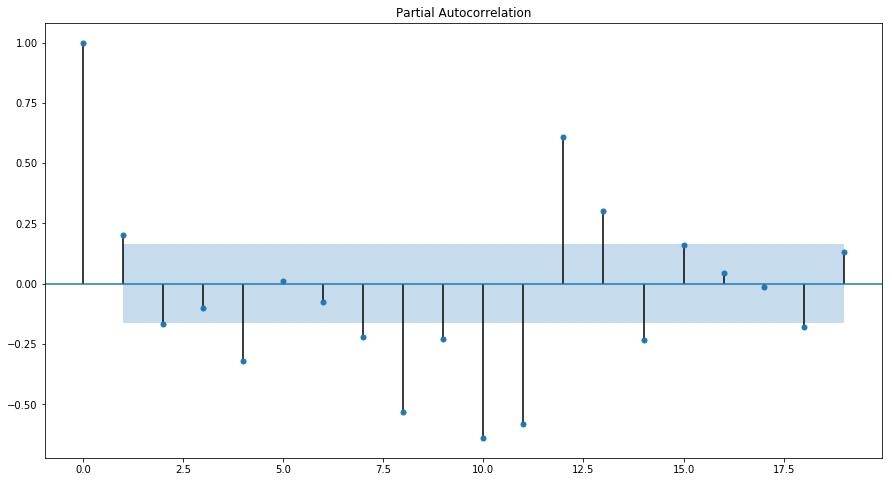

In [47]:
df_diff = df_diff.fillna(method='bfill')

#Time Series Forecasting Using Stochastic Models
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df_diff, lags = range(0, 20))
plt.show()
#PACF
plot_pacf(df_diff, lags = range(0, 20))
plt.show()

#The shaded regions in the plots are the confidence intervals. The lags where the PACF #and ACF charts cross this region are the values for p and q respectively. In both plots, #p=q=1.

#The shaded regions in the plots are the confidence intervals. The lags where the PACF and #ACF charts cross this region are the values for p and q respectively. 
#In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly #in the PACF plot, p=2

C:\Users\OLUWAJOBA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS:0.5914')

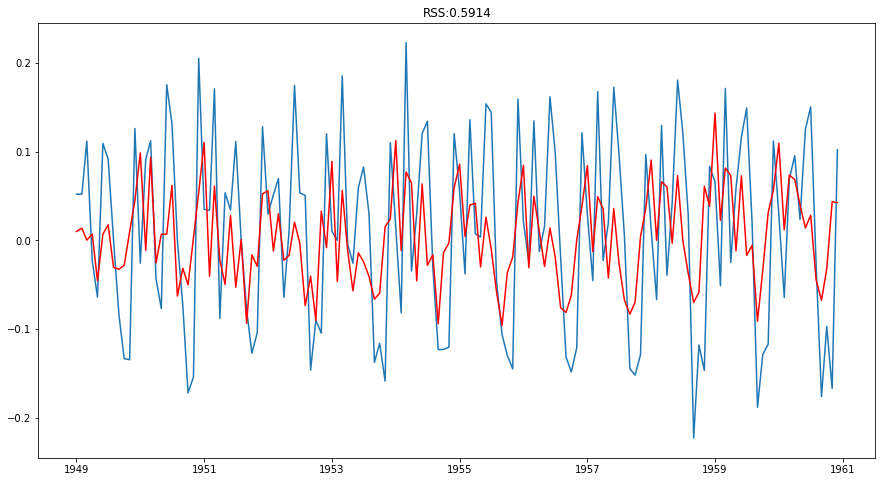

In [53]:

#AR, MA and ARIMA
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,2))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum(AR_model_results.fittedvalues-df_diff['Passengers'])**2)

C:\Users\OLUWAJOBA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS:0.0006')

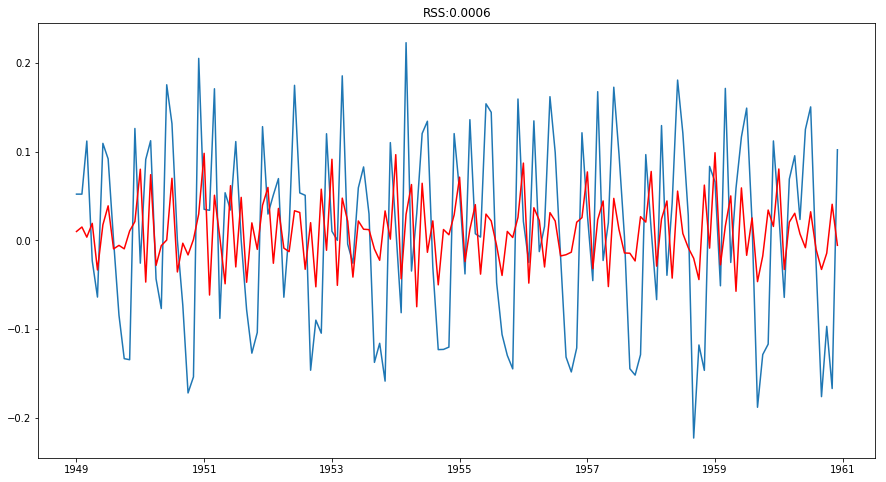

In [54]:
MA_model = ARIMA(df_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

plt.title('RSS:%.4f'% sum(MA_model_results.fittedvalues-df_diff['Passengers'])**2)

C:\Users\OLUWAJOBA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


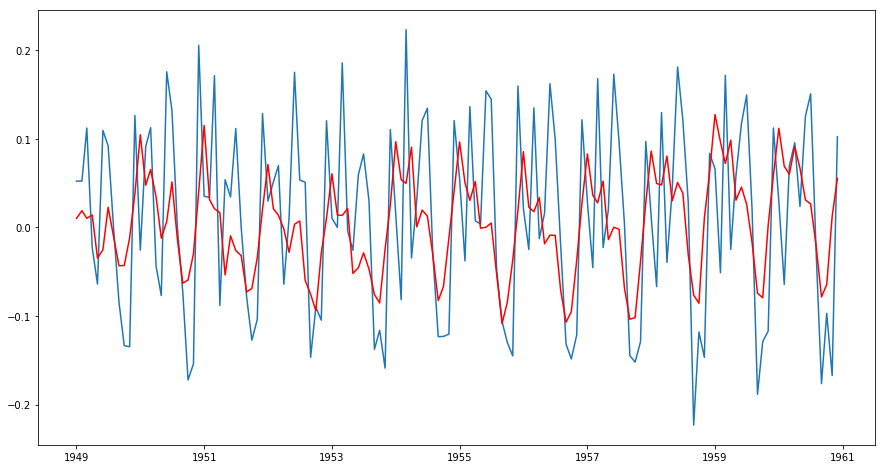

In [50]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')

In [57]:
predictions_ARIMS_diff=pd.Series(ARIMA_results.fittedvalues,cppy=True)
predictions_ARIMS_diff

ValueError: non-broadcastable output operand with shape (144,) doesn't match the broadcast shape (144,144)

In [55]:
from fbprophet import Prophet
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month']= pd.to_datetime(df['Month'])
df = df.rename(columns={"Month": "ds", "Passengers": "y"})
df.head()

model = Prophet()
model.fit(df)

#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


model.plot(forecast)
plt.show()


ModuleNotFoundError: No module named 'fbprophet'